# Chapter 2:

In [2]:
import networkx as nx

G = nx.Graph()

G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
G

In [3]:
def bfs(graph, node):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

In [4]:
bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [6]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited = dfs(visited, graph, neighbor)
    return visited

In [9]:
dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']

# Chapter 3:

## Skipgram:

In [5]:
import numpy as np

CONTEXT_SIZE = 2

text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eu sem 
scelerisque, dictum eros aliquam, accumsan quam. Pellentesque tempus, lorem ut 
semper fermentum, ante turpis accumsan ex, sit amet ultricies tortor erat quis 
nulla. Nunc consectetur ligula sit amet purus porttitor, vel tempus tortor 
scelerisque. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices 
posuere cubilia curae; Quisque suscipit ligula nec faucibus accumsan. Duis 
vulputate massa sit amet viverra hendrerit. Integer maximus quis sapien id 
convallis. Donec elementum placerat ex laoreet gravida. Praesent quis enim 
facilisis, bibendum est nec, pharetra ex. Etiam pharetra congue justo, eget 
imperdiet diam varius non. Mauris dolor lectus, interdum in laoreet quis, 
faucibus vitae velit. Donec lacinia dui eget maximus cursus. Class aptent taciti
sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Vivamus
tincidunt velit eget nisi ornare convallis. Pellentesque habitant morbi 
tristique senectus et netus et malesuada fames ac turpis egestas. Donec 
tristique ultrices tortor at accumsan.
""".split()



In [6]:
np.arange(1-CONTEXT_SIZE, 1+CONTEXT_SIZE+1)

array([-1,  0,  1,  2,  3])

In [7]:
range(CONTEXT_SIZE, len(text)-CONTEXT_SIZE)

range(2, 154)

In [8]:
skipgrams = []

for i in range(CONTEXT_SIZE, len(text)-CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i-CONTEXT_SIZE, i+CONTEXT_SIZE+1) if j!=i]
    skipgrams.append([text[i], array])

skipgrams

[['dolor', ['Lorem', 'ipsum', 'sit', 'amet,']],
 ['sit', ['ipsum', 'dolor', 'amet,', 'consectetur']],
 ['amet,', ['dolor', 'sit', 'consectetur', 'adipiscing']],
 ['consectetur', ['sit', 'amet,', 'adipiscing', 'elit.']],
 ['adipiscing', ['amet,', 'consectetur', 'elit.', 'Nunc']],
 ['elit.', ['consectetur', 'adipiscing', 'Nunc', 'eu']],
 ['Nunc', ['adipiscing', 'elit.', 'eu', 'sem']],
 ['eu', ['elit.', 'Nunc', 'sem', 'scelerisque,']],
 ['sem', ['Nunc', 'eu', 'scelerisque,', 'dictum']],
 ['scelerisque,', ['eu', 'sem', 'dictum', 'eros']],
 ['dictum', ['sem', 'scelerisque,', 'eros', 'aliquam,']],
 ['eros', ['scelerisque,', 'dictum', 'aliquam,', 'accumsan']],
 ['aliquam,', ['dictum', 'eros', 'accumsan', 'quam.']],
 ['accumsan', ['eros', 'aliquam,', 'quam.', 'Pellentesque']],
 ['quam.', ['aliquam,', 'accumsan', 'Pellentesque', 'tempus,']],
 ['Pellentesque', ['accumsan', 'quam.', 'tempus,', 'lorem']],
 ['tempus,', ['quam.', 'Pellentesque', 'lorem', 'ut']],
 ['lorem', ['Pellentesque', 'tempus,'

In [9]:
vocab = set(text)

VOCAB_SIZE = len(vocab)

print(f"Length of vocabulary = {VOCAB_SIZE}")

Length of vocabulary = 121


In [10]:
N=10

In [11]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec([text],
                 sg=1,
                 vector_size=10,
                 min_count=0,
                 window=2,
                 workers=2,
                 seed=0)

In [12]:
print(f"Shape of W_embed: {model.wv.vectors.shape}")

Shape of W_embed: (121, 10)


In [13]:
model.train([text], total_examples=model.corpus_count, epochs=10)

(690, 1560)

In [14]:
print("Word embedding =")
print(model.wv[0])

Word embedding =
[ 0.07156403  0.03257632  0.00209916 -0.04374931 -0.03398107 -0.08656936
 -0.09047253 -0.0955243  -0.06482638  0.0660186 ]


## Random walk

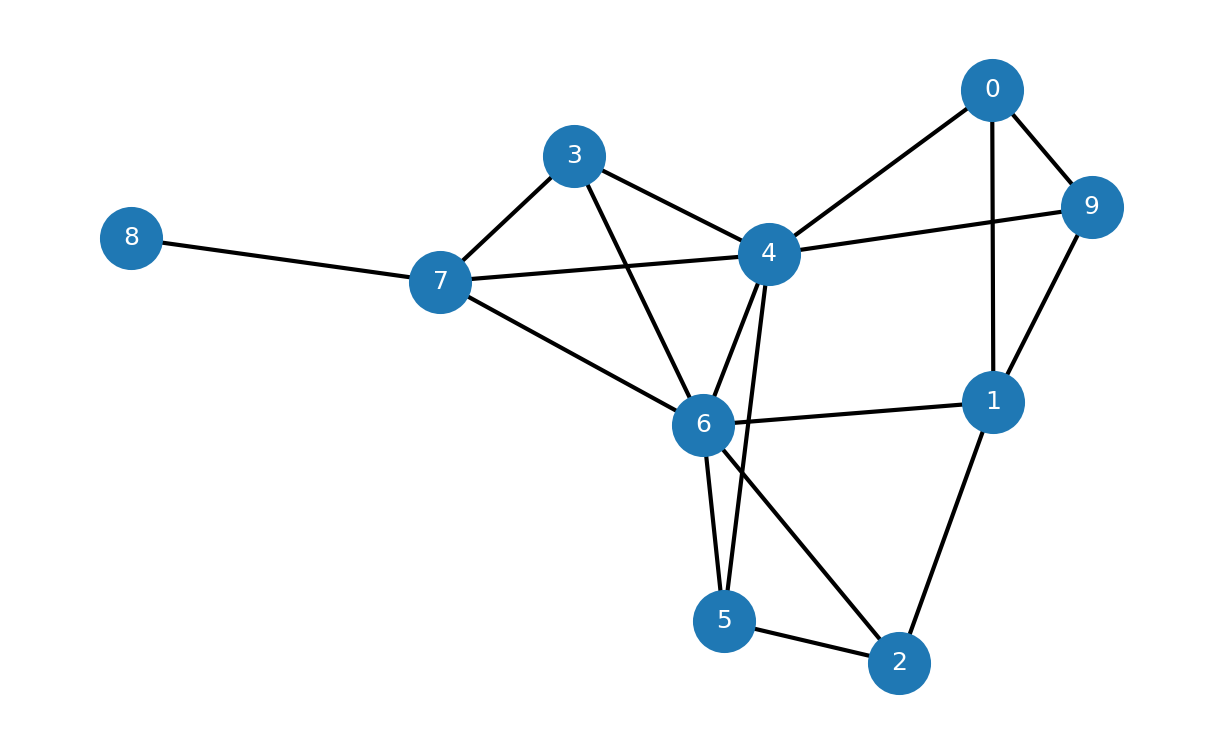

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(0)

G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed = False)

plt.figure(dpi=300, figsize=[5,3])
plt.axis('off')

nx.draw_networkx(G,
                 pos=nx.spring_layout(G,seed=0),
                 node_size=200,
                 cmap='coolwarm',
                 font_size=6,
                 font_color='white'
                 )

In [24]:
def random_walk(start, length):
    walk = [str(start)] # starting node

    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node

    return walk


In [25]:
print(random_walk(0, 10))

['0', '9', '4', '3', '6', '4', '7', '8', '7', '6', '4']


## Implementing DeepWalk:

In [34]:
G = nx.karate_club_graph()

In [35]:
labels = []

for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

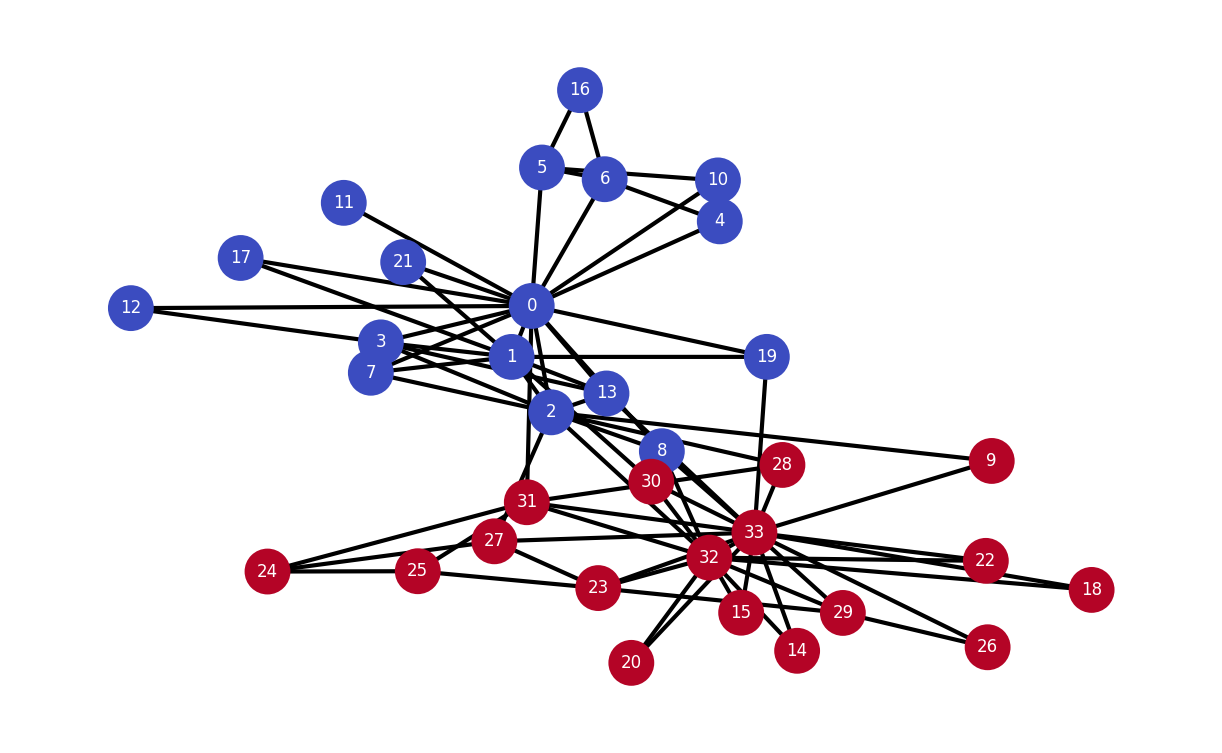

In [36]:
plt.figure(dpi=300, figsize=[5,3])
plt.axis('off')

nx.draw_networkx(G,
                 pos=nx.spring_layout(G,seed=0),
                 node_color=labels,
                 node_size=100,
                 cmap='coolwarm',
                 font_size=4,
                 font_color='white'
                 )

In [37]:
walks = []
random_walk_num = 80
walk_size = 10
for node in G.nodes:
    for _ in range(random_walk_num):
        walks.append(random_walk(node, walk_size))

In [38]:
print(walks[0])

['0', '31', '24', '27', '33', '29', '23', '25', '31', '28', '33']


In [39]:
model = Word2Vec(walks,
                 hs=1,
                 sg=1,
                 vector_size=100,
                 window=10,
                 workers=2,
                 seed=0
                 )

In [40]:
model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

(186772, 897600)

In [41]:
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'     {similarity}')

Nodes that are the most similar to node 0:
     ('4', 0.7058767676353455)
     ('21', 0.6604698300361633)
     ('10', 0.6261380314826965)
     ('6', 0.6150196194648743)
     ('5', 0.6014366745948792)
     ('11', 0.5986406207084656)
     ('1', 0.5760220885276794)
     ('17', 0.5677155256271362)
     ('7', 0.5392574667930603)
     ('16', 0.5316615104675293)


In [42]:
# Similarity between  two nodes:

print(f"Similarity between node 0 and 4: {model.wv.similarity('0', '4')}")

Similarity between node 0 and 4: 0.7058767676353455


In [43]:
from sklearn.manifold import TSNE

nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

In [44]:
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0). fit_transform(nodes_wv)

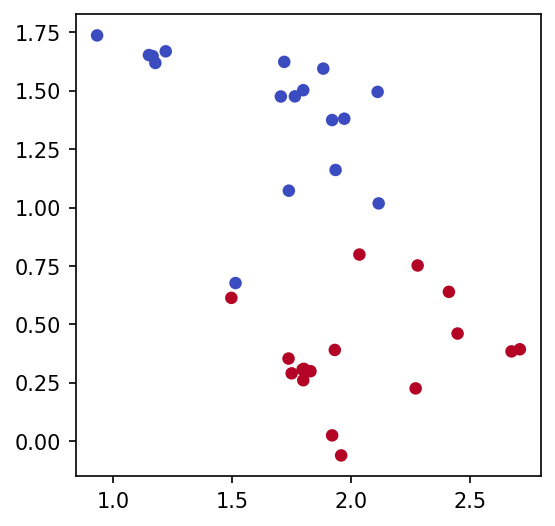

In [51]:
plt.figure(figsize=[4,4], dpi=150)

plt.scatter(tsne[:,0], tsne[:,1], s=25, c=labels, cmap='coolwarm')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_mask = list(np.arange(0, len(G.nodes), 2))
test_mask = list(np.arange(1, len(G.nodes), 2))

In [57]:
print(f"train_mask: {train_mask}")
print(f"test_mask: {test_mask}")

train_mask: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
test_mask: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]


In [58]:
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [60]:
# Example from book
train_mask = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
test_mask = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30, 31, 32, 33]

In [61]:
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

RandomForestClassifier(random_state=0)

In [62]:
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f"Accuracy: {acc}")

Accuracy: 0.9473684210526315


# Chapter 4